# Importing required libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

# Importing low cost sensor data

In [47]:
data = pd.read_csv('Broadway East First School.csv')        # Importing data

In [48]:
data_pm25 = data[data.Variable == 'PM2.5']        # Data we need is only pm2.5

In [49]:
data_required = data_pm25.loc[:, ['Timestamp', 'Value']]  # Creating another dataframe with timestamps and required values

In [50]:
data = data_required.reset_index().loc[:, ['Timestamp', 'Value']]    # To reset index in new dataframe

In [51]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])    # Converting timestamp to date and time format

# Importing high cost sensor data

In [52]:
data2 = pd.read_csv('Newcastle_UB_2018.csv')        # Importing data
data2

,Unnamed: 0,site,code,date,Unnamed: 4,no2,no2_UT,Unnamed: 7,pm10,pm10_UT,Unnamed: 10,pm2.5
0,1.0,Newcastle Centre,NEWC,1/1/2018 0:00,NaN,13.77720,17.86228,NaN,8.7,NaN,NaN,5.6
1,2.0,Newcastle Centre,NEWC,1/1/2018 1:00,NaN,23.81443,36.47562,NaN,5.4,NaN,NaN,1.6
2,3.0,Newcastle Centre,NEWC,1/1/2018 2:00,NaN,21.32087,41.82725,NaN,5.4,NaN,NaN,1.7
3,4.0,Newcastle Centre,NEWC,1/1/2018 3:00,NaN,20.89992,43.05505,NaN,6.8,NaN,NaN,0.8
4,5.0,Newcastle Centre,NEWC,1/1/2018 4:00,NaN,27.68017,57.01818,NaN,4.3,NaN,NaN,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...
8761,NaN,NaN,NaN,Average,NaN,34.10000,NaN,NaN,13.8,NaN,NaN,9.0
8762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8763,NaN,NaN,NaN,SD,NaN,22.70000,NaN,NaN,12.4,NaN,NaN,7.8
8764,NaN,NaN,NaN,Min,NaN,1.10000,NaN,NaN,-3.9,NaN,NaN,-4.3


In [53]:
data2 = data2.loc[:8759, ['date', 'pm2.5']]    # Data we need is only pm2.5
data2

,date,pm2.5
0,1/1/2018 0:00,5.6
1,1/1/2018 1:00,1.6
2,1/1/2018 2:00,1.7
3,1/1/2018 3:00,0.8
4,1/1/2018 4:00,2.3
...,...,...
8755,12/31/2018 19:00,8.8
8756,12/31/2018 20:00,8.1
8757,12/31/2018 21:00,8.9
8758,12/31/2018 22:00,7.4


In [54]:
data2['date'] = pd.to_datetime(data2['date'])    # Converting date to date and time format
data2

,date,pm2.5
0,2018-01-01 00:00:00,5.6
1,2018-01-01 01:00:00,1.6
2,2018-01-01 02:00:00,1.7
3,2018-01-01 03:00:00,0.8
4,2018-01-01 04:00:00,2.3
...,...,...
8755,2018-12-31 19:00:00,8.8
8756,2018-12-31 20:00:00,8.1
8757,2018-12-31 21:00:00,8.9
8758,2018-12-31 22:00:00,7.4


In [55]:
print(data)
print(data2)

                  Timestamp   Value
0       2018-03-27 11:15:00  2.5070
1       2018-03-27 11:30:00  2.6780
2       2018-03-27 11:45:00  3.1820
3       2018-03-27 12:00:00  2.2240
4       2018-03-27 12:15:00  2.5075
...                     ...     ...
1018286 2020-12-30 23:55:00  6.0640
1018287 2020-12-30 23:56:00  5.7570
1018288 2020-12-30 23:57:00  6.2130
1018289 2020-12-30 23:58:00  5.7570
1018290 2020-12-30 23:59:00  6.0220

[1018291 rows x 2 columns]
                    date  pm2.5
0    2018-01-01 00:00:00    5.6
1    2018-01-01 01:00:00    1.6
2    2018-01-01 02:00:00    1.7
3    2018-01-01 03:00:00    0.8
4    2018-01-01 04:00:00    2.3
...                  ...    ...
8755 2018-12-31 19:00:00    8.8
8756 2018-12-31 20:00:00    8.1
8757 2018-12-31 21:00:00    8.9
8758 2018-12-31 22:00:00    7.4
8759 2018-12-31 23:00:00    7.9

[8760 rows x 2 columns]


# Filtering out common data in both dataframes

In [56]:
index = []                           # index is the list of all indices of data2 which will have common date and time with data
for indexi, row in data2.iterrows():         # loop through data2 to check for all indices           
    if (row['date'] in data.Timestamp.values) == True:
        index.append(indexi)
        
data2_required = data2.loc[index, :]      # data2_required contains only the rows with index in index list

In [57]:
data2_required.reset_index(inplace = True)
data2_required = data2_required.loc[:, ['date', 'pm2.5']]
data2_required

,date,pm2.5
0,2018-03-27 12:00:00,11.1
1,2018-03-27 13:00:00,5.4
2,2018-03-27 14:00:00,2.2
3,2018-03-27 15:00:00,2.4
4,2018-03-27 16:00:00,2.6
...,...,...
3815,2018-12-31 19:00:00,8.8
3816,2018-12-31 20:00:00,8.1
3817,2018-12-31 21:00:00,8.9
3818,2018-12-31 22:00:00,7.4


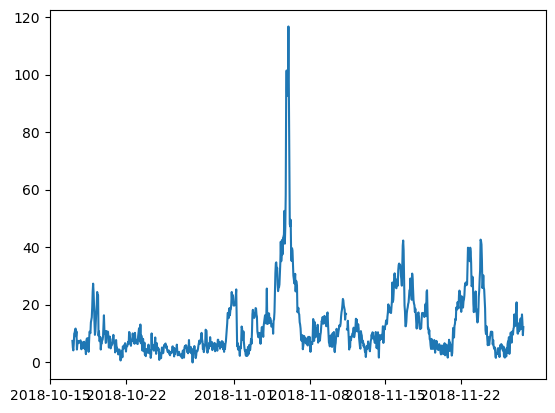

In [88]:
data2_plot = data2_required.loc[2000:3000, :]
plt.plot(data2_plot['date'], data2_plot['pm2.5'])
plt.show()    

In [59]:
index = []                    # index is the list of all indices of data which will have common date and time with data2_required
for indexi, row in data.iterrows():    # loop through data to check for all indices
    if (row['Timestamp'] in data2_required.date.values) == True:
        index.append(indexi)
        
data_required = data.loc[index, :]    # data_required contains only the rows with index in index list

In [60]:
data_required.reset_index(inplace = True)
data_required = data_required.loc[:, ['Timestamp', 'Value']]
data_required

,Timestamp,Value
0,2018-03-27 12:00:00,2.2240
1,2018-03-27 13:00:00,2.2242
2,2018-03-27 14:00:00,1.9571
3,2018-03-27 15:00:00,2.3209
4,2018-03-27 16:00:00,2.0311
...,...,...
3815,2018-12-31 19:00:00,5.5130
3816,2018-12-31 20:00:00,5.7150
3817,2018-12-31 21:00:00,5.9370
3818,2018-12-31 22:00:00,6.6360


# data_plot contains data without any null value in time series format

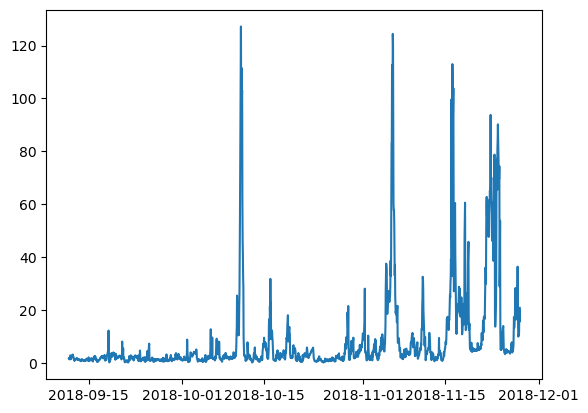

In [61]:
data_plot = data_required.loc[1150:3000, :]
plt.plot(data_plot['Timestamp'], data_plot['Value'])
plt.show()

In [62]:
data = data_required
data['pm2.5'] = data2_required['pm2.5']
# data['pm2.5'].fillna(data['pm2.5'].mean(), inplace=True)
data.isna().sum()

Timestamp      0
Value          0
pm2.5        316
dtype: int64

In [63]:
data_plot = data.iloc[1200:, :]
data_plot

,Timestamp,Value,pm2.5
1200,2018-09-13 16:00:00,1.1836,0.3
1201,2018-09-13 17:00:00,0.8725,2.7
1202,2018-09-13 18:00:00,0.8762,3.2
1203,2018-09-13 19:00:00,1.0171,1.9
1204,2018-09-13 20:00:00,1.4492,3.5
...,...,...,...
3815,2018-12-31 19:00:00,5.5130,8.8
3816,2018-12-31 20:00:00,5.7150,8.1
3817,2018-12-31 21:00:00,5.9370,8.9
3818,2018-12-31 22:00:00,6.6360,7.4


In [64]:
data_plot.set_index(data_plot['Timestamp'], inplace=True)
data_plot

,Timestamp,Value,pm2.5
Timestamp,,,
2018-09-13 16:00:00,2018-09-13 16:00:00,1.1836,0.3
2018-09-13 17:00:00,2018-09-13 17:00:00,0.8725,2.7
2018-09-13 18:00:00,2018-09-13 18:00:00,0.8762,3.2
2018-09-13 19:00:00,2018-09-13 19:00:00,1.0171,1.9
2018-09-13 20:00:00,2018-09-13 20:00:00,1.4492,3.5
...,...,...,...
2018-12-31 19:00:00,2018-12-31 19:00:00,5.5130,8.8
2018-12-31 20:00:00,2018-12-31 20:00:00,5.7150,8.1
2018-12-31 21:00:00,2018-12-31 21:00:00,5.9370,8.9


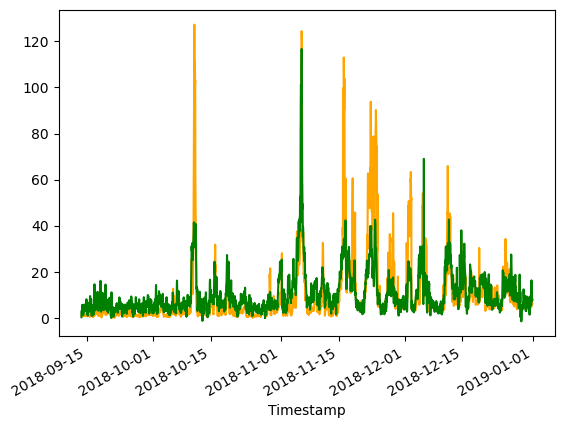

In [65]:
data_plot['Value'].plot(label='Value', color='orange')
data_plot['pm2.5'].plot(label='pm2.5', color='green')
plt.show()

In [66]:
data_plot.isna().sum()     # number of null values data_plot

Timestamp    0
Value        0
pm2.5        2
dtype: int64

In [67]:
data_plot.to_csv('Data to Plot.csv')